In [3]:
from sklearn import svm
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv("../Data/train.csv", sep=",")
train_label = pd.read_csv("../Data/train_label.csv", sep=",")
train.head()

,ID,企业类型,经营期限至,登记机关,企业状态,邮政编码,投资总额,注册资本,核准日期,行业代码,...,应收账款_年末数,一年内到期的非流动资产_年末数,油气资产_年末数,应收补贴款_年末数,应收股利_年末数,应收利息_年末数,应收票据_年末数,预付款项_年末数,资产总计_年末数,在建工程_年末数
0,1,9.0,NaN,1.0,0.0,266300,19.110000,19.110000,00:00.0,5154.0,...,142.310005,0.0,0.0,0.0,0.0,0.0,28.122902,1.004419,632.032182,0.0
1,3,11.0,NaN,5.0,0.0,266000,29.154194,19.210446,00:00.0,7214.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,0.0,NaN,3.0,0.0,266000,NaN,19.120045,13:31.0,2110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10,0.0,42:05.0,9.0,0.0,266000,NaN,19.160223,00:00.0,5163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,14,0.0,NaN,2.0,0.0,266400,NaN,19.210446,00:00.0,5439.0,...,156.901030,0.0,0.0,0.0,0.0,0.0,10.044194,0.508236,319.205293,0.0


In [5]:
np.where(train.isnull().sum()/train.shape[0]<0.5 )[0]

array([ 0,  1,  3,  4,  5,  7,  8,  9, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21], dtype=int64)

In [6]:
columns = ['ID', '企业类型', '登记机关', '企业状态', '邮政编码', '注册资本', '核准日期', '行业代码', '经营期限自',
       '成立日期', '行业门类', '企业类别', '管辖机关', '经营范围', '增值税', '企业所得税', '印花税', '教育费',
       '城建税']
train[columns].isnull().sum()/train.shape[0]

ID       0.000000
企业类型     0.053460
登记机关     0.053460
企业状态     0.053460
邮政编码     0.349993
注册资本     0.054086
核准日期     0.053808
行业代码     0.053947
经营期限自    0.056105
成立日期     0.053599
行业门类     0.053599
企业类别     0.053460
管辖机关     0.053529
经营范围     0.000000
增值税      0.045385
企业所得税    0.200195
印花税      0.092301
教育费      0.000000
城建税      0.041139
dtype: float64

In [7]:
train['经营范围'].map(lambda x: len(x)).head()

0    244
1    126
2     53
3     59
4    248
Name: 经营范围, dtype: int64

In [8]:
feature = [ '企业类型', '登记机关', '企业状态', '注册资本', '行业代码', 
        '行业门类', '企业类别', '管辖机关', '经营范围', '增值税', '企业所得税', '印花税', '教育费',
       '城建税']
train[feature].head()

,企业类型,登记机关,企业状态,注册资本,行业代码,行业门类,企业类别,管辖机关,经营范围,增值税,企业所得税,印花税,教育费,城建税
0,9.0,1.0,0.0,19.110000,5154.0,1.0,0.0,1.0,"[1412, 1024, 21375, 15023, 18526, 18789, 17022...",106.039650,0.331552,1.247218,3.181189,7.422776
1,11.0,5.0,0.0,19.210446,7214.0,0.0,2.0,3.0,"[3671, 24856, 13525, 21079, 13219, 13694, 1442...",39.175600,51.244655,0.014363,1.175269,2.742293
2,0.0,3.0,0.0,19.120045,2110.0,2.0,0.0,4.0,"[3671, 14394, 23662, 11227, 19205, 15633, 5344...",0.000000,0.000000,0.541067,4.637491,10.060346
3,0.0,9.0,0.0,19.160223,5163.0,1.0,0.0,8.0,"[3287, 17425, 7503, 19922, 12217, 5089, 24884,...",0.027578,0.000000,0.008166,0.001318,0.001930
4,0.0,2.0,0.0,19.210446,5439.0,4.0,0.0,2.0,"[10573, 2876, 12295, 12295, 12295, 12295, 1229...",29.784126,1.134480,0.001004,0.893524,2.084889


In [9]:
train = train.merge(train_label,on='ID',how = 'left')

In [10]:
train.head()

,ID,企业类型,经营期限至,登记机关,企业状态,邮政编码,投资总额,注册资本,核准日期,行业代码,...,一年内到期的非流动资产_年末数,油气资产_年末数,应收补贴款_年末数,应收股利_年末数,应收利息_年末数,应收票据_年末数,预付款项_年末数,资产总计_年末数,在建工程_年末数,Label
0,1,9.0,NaN,1.0,0.0,266300,19.110000,19.110000,00:00.0,5154.0,...,0.0,0.0,0.0,0.0,0.0,28.122902,1.004419,632.032182,0.0,0
1,3,11.0,NaN,5.0,0.0,266000,29.154194,19.210446,00:00.0,7214.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,9,0.0,NaN,3.0,0.0,266000,NaN,19.120045,13:31.0,2110.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,10,0.0,42:05.0,9.0,0.0,266000,NaN,19.160223,00:00.0,5163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,14,0.0,NaN,2.0,0.0,266400,NaN,19.210446,00:00.0,5439.0,...,0.0,0.0,0.0,0.0,0.0,10.044194,0.508236,319.205293,0.0,0


In [11]:
train['经营范围'] = train['经营范围'].map(lambda x : len(x))

In [12]:
feature.append('Label')
dataset = train[feature]
dataset.head()


,企业类型,登记机关,企业状态,注册资本,行业代码,行业门类,企业类别,管辖机关,经营范围,增值税,企业所得税,印花税,教育费,城建税,Label
0,9.0,1.0,0.0,19.110000,5154.0,1.0,0.0,1.0,244,106.039650,0.331552,1.247218,3.181189,7.422776,0
1,11.0,5.0,0.0,19.210446,7214.0,0.0,2.0,3.0,126,39.175600,51.244655,0.014363,1.175269,2.742293,0
2,0.0,3.0,0.0,19.120045,2110.0,2.0,0.0,4.0,53,0.000000,0.000000,0.541067,4.637491,10.060346,0
3,0.0,9.0,0.0,19.160223,5163.0,1.0,0.0,8.0,59,0.027578,0.000000,0.008166,0.001318,0.001930,0
4,0.0,2.0,0.0,19.210446,5439.0,4.0,0.0,2.0,248,29.784126,1.134480,0.001004,0.893524,2.084889,0


In [13]:
dataset = dataset.dropna()

In [14]:
dataset = dataset.values

In [15]:
dataset

array([[ 9.        ,  1.        ,  0.        , ...,  3.18118923,
         7.42277622,  0.        ],
       [11.        ,  5.        ,  0.        , ...,  1.17526918,
         2.74229309,  0.        ],
       [ 0.        ,  3.        ,  0.        , ...,  4.63749146,
        10.06034602,  0.        ],
       ...,
       [ 2.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        ,  1.        , ...,  0.66412917,
         1.5496369 ,  0.        ],
       [ 0.        ,  1.        ,  0.        , ...,  1.2601808 ,
         2.94042186,  0.        ]])

In [16]:

x_train,x_test,y_train,y_test = train_test_split(dataset[:,:-1],dataset[:,-1],test_size=0.3)
model = svm.SVC(kernel='rbf',gamma=0.04)


In [17]:
model.fit(x_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.04, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
# 打印支持向量(点)
# print(model.support_vectors_)
# 支持向量在数据集中的索引
# print(model.support_)
print(y_test == model.predict(x_test))
print(y_test.size) 
print(np.sum(y_test == model.predict(x_test)))

[ True  True  True ...  True  True  True]
2891
2603


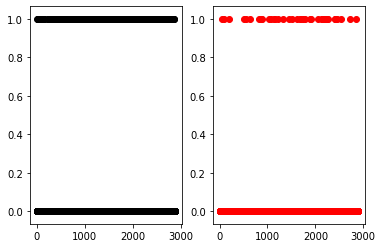

In [33]:
ax1 = plt.subplot(1,2,1)
ax1.scatter(
    np.arange(0,2891),
    y_test,
    c = 'black'
)
ax2 = plt.subplot(1,2,2)
ax2.scatter(
    np.arange(0,2891),
    model.predict(x_test),
    c = 'red'
)

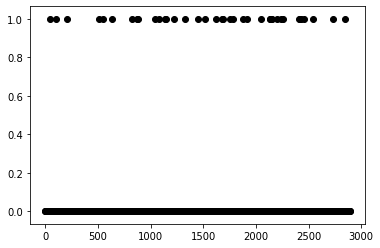